## Table of contents

1. Importing libraries and data
2. Data cleaning and prep for regression analysis
   - 2.1 Remove outliers and NaNs
   - 2.2 Reshaping data
3. Regression analysis
     - 3.1 Hypotheses
     - 3.2 Analysis
4. Reflections on the analysis

### 1. Importing libraries and data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [19]:
path = r'INSERT-YOUR-PATH'

In [20]:
#Importing data as df
df = pd.read_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'dataset_08-23_2024-12-13.pkl'))

### 2. Data cleaning and prep for regression analysis 

In [22]:
#Identify names of variables
df.columns

Index(['Country', 'Year', 'Happiness', 'GDP_log', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Pos_affect',
       'Neg_affect', 'Democracy', 'Inflation', '_merge'],
      dtype='object')

In [23]:
df.describe()

,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Pos_affect,Neg_affect,Democracy,Inflation
count,2145.000000,2145.000000,2119.000000,2134.000000,2086.000000,2115.000000,2099.000000,2032.000000,2126.000000,2131.000000,1854.000000,1768.000000
mean,2015.619580,5.486447,9.414251,0.807228,63.584461,0.753157,-0.000332,0.741513,0.651248,0.275226,5.766828,6.203946
std,4.495726,1.126571,1.150054,0.122006,6.638456,0.138296,0.160841,0.185239,0.106672,0.088548,2.126861,18.227375
min,2008.000000,1.281000,5.527000,0.228000,17.360000,0.228000,-0.340000,0.035000,0.179000,0.083000,0.320000,-3.749145
25%,2012.000000,4.647000,8.521000,0.741000,59.400000,0.663500,-0.112500,0.682750,0.571000,0.209000,3.940000,1.589898
50%,2016.000000,5.465000,9.518000,0.832000,65.210000,0.773000,-0.024000,0.796000,0.663000,0.265000,5.990000,3.466150
75%,2019.000000,6.325000,10.405000,0.903000,68.715000,0.863000,0.093000,0.866000,0.737000,0.329000,7.530000,6.913544
max,2023.000000,7.971000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000,9.930000,557.201817


#### 2.1 Remove outliers and NaNs

Remove extreme inflation values

In [26]:
df_2 = df[(df['Inflation'] <= 50) | (df['Inflation'].isna())]

In [27]:
df_2.shape

(2132, 14)

In [28]:
# Check for missing values
df_2.isnull().sum()

Country              0
Year                 0
Happiness            0
GDP_log             26
Social_support      11
Life_expectancy     59
Freedom             30
Generosity          46
Corruption         113
Pos_affect          19
Neg_affect          14
Democracy          291
Inflation          377
_merge               0
dtype: int64

LinearRegression does not accept missing values encoded as NaN natively. While scatterplots will work I need to create new dfs for each variable for the regression analysis.

In [30]:
df_gdp = df_2[df_2['GDP_log'].notna()] 

In [31]:
df_gdp.shape

(2106, 14)

In [32]:
df_soc= df_2[df_2['Social_support'].notna()]

In [33]:
df_soc.shape

(2121, 14)

In [34]:
df_dem= df_2[df_2['Democracy'].notna()]

In [35]:
df_dem.shape

(1841, 14)

In [36]:
df_in= df_2[df_2['Inflation'].notna()]

In [37]:
df_in.shape

(1755, 14)

In [38]:
df_life= df_2[df_2['Life_expectancy'].notna()]

In [39]:
df_life.shape

(2073, 14)

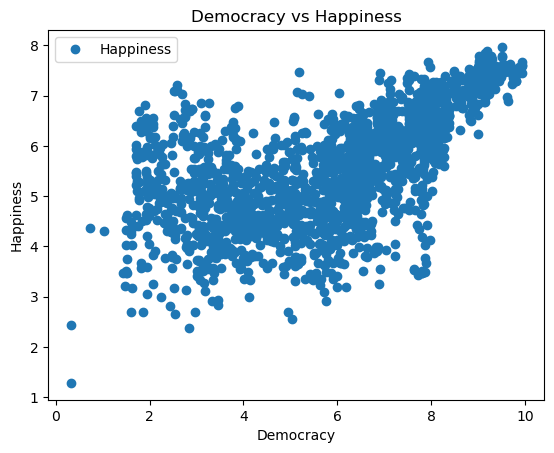

In [40]:
# Scatterplot Happiness vs Democracy
df_dem.plot(x = 'Democracy', y='Happiness',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Democracy vs Happiness')  
plt.xlabel('Democracy')  
plt.ylabel('Happiness')  
plt.show()

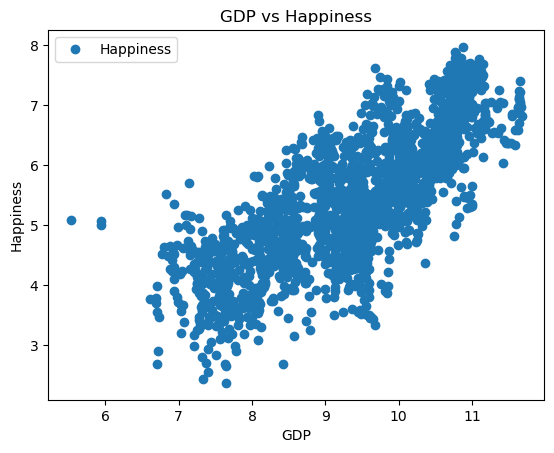

In [41]:
# Scatterplot Happiness vs GDP

df_gdp.plot(x = 'GDP_log', y='Happiness',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP vs Happiness')  
plt.xlabel('GDP')  
plt.ylabel('Happiness')  
plt.show()

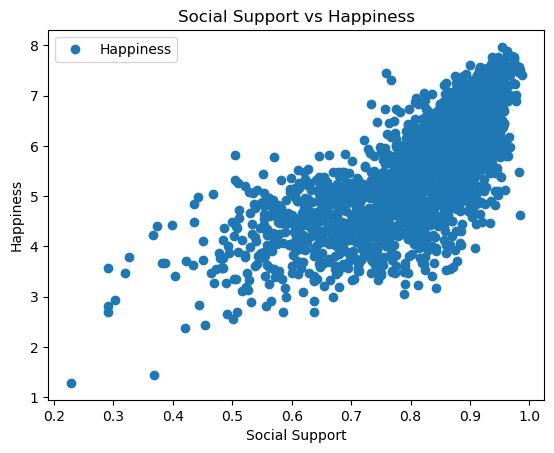

In [42]:
# Scatterplot Happiness vs Social Support

df_soc.plot(x = 'Social_support', y='Happiness',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Social Support vs Happiness')  
plt.xlabel('Social Support')  
plt.ylabel('Happiness')  
plt.show()

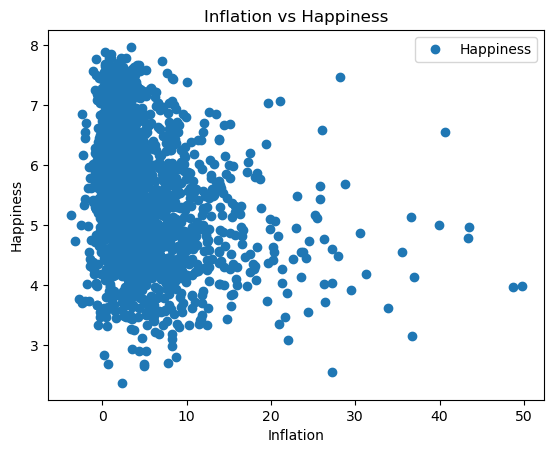

In [43]:
# Scatterplot Happiness vs Inflation

df_in.plot(x = 'Inflation', y='Happiness',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Inflation vs Happiness')  
plt.xlabel('Inflation')  
plt.ylabel('Happiness')  
plt.show()

#### 2.2 Reshaping data

**Democracy**

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_dem = df_dem['Democracy'].values.reshape(-1,1)
y_dem = df_dem['Happiness'].values.reshape(-1,1)

In [47]:
X_dem

array([[3.02],
       [2.48],
       [2.48],
       ...,
       [3.05],
       [3.16],
       [3.16]])

In [48]:
y_dem

array([[3.724],
       [4.758],
       [3.832],
       ...,
       [3.735],
       [3.638],
       [3.616]])

In [49]:
# Split data into a training set and a test set.
X_dem_train, X_dem_test, y_dem_train, y_dem_test = train_test_split(X_dem, y_dem, test_size=0.3, random_state=0)

**Inflation**

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_in = df_in['Inflation'].values.reshape(-1,1)
y_in = df_in['Happiness'].values.reshape(-1,1)

In [52]:
# Split data into a training set and a test set.
X_in_train, X_in_test, y_in_train, y_in_test = train_test_split(X_in, y_in, test_size=0.3, random_state=0)

**GDP**

In [54]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_gdp = df_gdp['GDP_log'].values.reshape(-1,1)
y_gdp = df_gdp['Happiness'].values.reshape(-1,1)

In [55]:
# Split data into a training set and a test set.
X_gdp_train, X_gdp_test, y_gdp_train, y_gdp_test = train_test_split(X_gdp, y_gdp, test_size=0.3, random_state=0)

**Social Support**

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_soc = df_soc['Social_support'].values.reshape(-1,1)
y_soc = df_soc['Happiness'].values.reshape(-1,1)

In [58]:
# Split data into a training set and a test set.
X_soc_train, X_soc_test, y_soc_train, y_soc_test = train_test_split(X_soc, y_soc, test_size=0.3, random_state=0)

**Life expectancy**

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_life = df_life['Life_expectancy'].values.reshape(-1,1)
y_life = df_life['Happiness'].values.reshape(-1,1)

In [61]:
# Split data into a training set and a test set.
X_life_train, X_life_test, y_life_train, y_life_test = train_test_split(X_life, y_life, test_size=0.3, random_state=0)

### 3. Regression analysis

#### 3.1 Hypotheses
<ul>
<li>Happiness is influenced by many factors and we will not see a clear 1:1 relationship</li>
<li>The models will perform better to predict happiness based on democracy, GDP, social support and life expectancy than for inflation. </li>
</ul>

#### 3.2 Analysis

**Democracy**

In [66]:
# Create a regression object.
regression_dem = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [67]:
# Fit the regression object onto the training set.
regression_dem.fit(X_dem_train, y_dem_train)

LinearRegression()

In [68]:
# Predict the values of y using X.
y_dem_predicted = regression_dem.predict(X_dem_test)

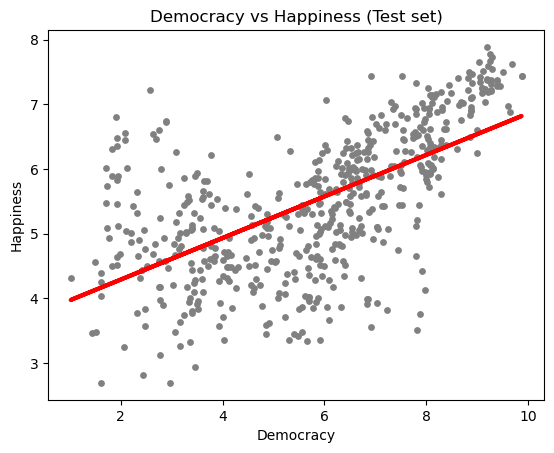

In [69]:
# Create a plot that shows the regression line from the model on the test set.
plot_dem_test = plt
plot_dem_test.scatter(X_dem_test, y_dem_test, color='gray', s = 15)
plot_dem_test.plot(X_dem_test, y_dem_predicted, color='red', linewidth =3)
plot_dem_test.title('Democracy vs Happiness (Test set)')
plot_dem_test.xlabel('Democracy')
plot_dem_test.ylabel('Happiness')
plot_dem_test.show()

In [70]:
# Create objects that contain the model summary statistics.
rmse_dem = mean_squared_error(y_dem_test, y_dem_predicted) # This is the mean squared error
r2_dem = r2_score(y_dem_test, y_dem_predicted) # This is the R2 score. 

In [71]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_dem.coef_)
print('Mean squared error: ', rmse_dem)
print('R2 score: ', r2_dem)

Slope: [[0.32144702]]
Mean squared error:  0.7567068675278946
R2 score:  0.38997317352580174


In [72]:
df_2['Happiness'].describe()

count    2132.000000
mean        5.495847
std         1.118452
min         1.281000
25%         4.653000
50%         5.472000
75%         6.333000
max         7.971000
Name: Happiness, dtype: float64

In [73]:
print('Variance is:', 1.120644 ** 2)

Variance is: 1.255842974736


MSE is considered to be good if less than 10% of variance, i.e. 0.13. In this case MSE of 0.76 exceed this value significantly and is not good.

In [75]:
# Create a dataframe comparing the actual and predicted values of y_dem.
data_dem = pd.DataFrame({'Actual': y_dem_test.flatten(), 'Predicted': y_dem_predicted.flatten()})
data_dem.head(15)

,Actual,Predicted
0,4.653,4.400089
1,5.908,5.836957
2,6.336,6.258052
3,6.608,6.200192
4,6.017,5.689091
5,6.927,6.151975
6,5.876,5.936605
7,6.944,6.206621
8,5.319,5.737308
9,5.829,4.268295


**Conclusion:** there is no simple linear relation between democracy and happiness.

**Inflation**

In [78]:
# Create a regression object.
regression_in = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [79]:
# Fit the regression object onto the training set.
regression_in.fit(X_in_train, y_in_train)

LinearRegression()

In [80]:
# Predict the values of y using X.
y_in_predicted = regression_in.predict(X_in_test)

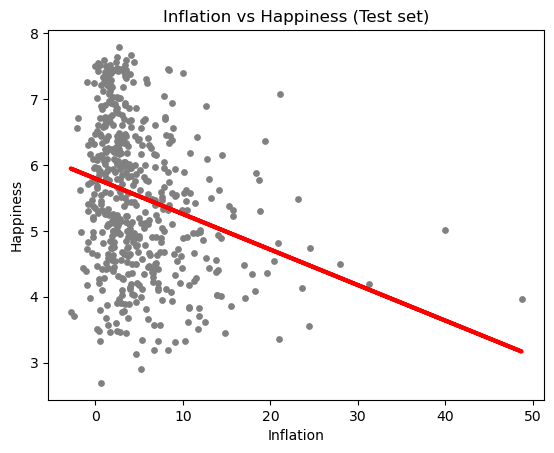

In [81]:
# Create a plot that shows the regression line from the model on the test set.
plot_in_test = plt
plot_in_test.scatter(X_in_test, y_in_test, color='gray', s = 15)
plot_in_test.plot(X_in_test, y_in_predicted, color='red', linewidth =3)
plot_in_test.title('Inflation vs Happiness (Test set)')
plot_in_test.xlabel('Inflation')
plot_in_test.ylabel('Happiness')
plot_in_test.show()

In [82]:
# Create objects that contain the model summary statistics.
rmse_in = mean_squared_error(y_in_test, y_in_predicted) # This is the mean squared error
r2_in = r2_score(y_in_test, y_in_predicted) # This is the R2 score. 

In [83]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_in.coef_)
print('Mean squared error: ', rmse_in)
print('R2 score: ', r2_in)

Slope: [[-0.05387492]]
Mean squared error:  1.197992496733478
R2 score:  0.0741532472434665


In [84]:
df_in['Inflation'].describe()

count    1755.000000
mean        5.081698
std         5.737843
min        -3.749145
25%         1.569507
50%         3.437049
75%         6.797092
max        49.721102
Name: Inflation, dtype: float64

In [85]:
print('Variance is:', 5.737843 ** 2)

Variance is: 32.922842292649


MSE is considered to be good if less than 10% of variance, i.e. 3.29. In this case MSE of 1.20 is less than this value. However, R² is extremely low, showing that the model can only account for 7% of the variance of the data, showing that overall it is not a good fit. This was to be expected since we already know from previous analysis that there is no correlation.

In [87]:
# Create a dataframe comparing the actual and predicted values of y_dem.
data_in = pd.DataFrame({'Actual': y_in_test.flatten(), 'Predicted': y_in_predicted.flatten()})
data_in.head(15)

,Actual,Predicted
0,5.186,5.643216
1,4.989,5.147330
2,5.239,5.706294
3,6.608,5.422998
4,4.683,5.397428
5,6.090,5.721118
6,4.435,5.094087
7,5.477,5.441859
8,6.944,5.695625
9,3.616,5.221167


**Compare how the regression fits the training set**

In [89]:
# Predict.

y_in_predicted_train = regression_in.predict(X_in_train) # This is predicting X_train!

In [90]:
# Create objects that contain the model summary statistics.
rmse_in_train = mean_squared_error(y_in_train, y_in_predicted_train) # This is the mean squared error
r2_in_train = r2_score(y_in_train, y_in_predicted_train) # This is the R2 score. 

In [91]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_in.coef_)
print('Mean squared error: ', rmse_in_train)
print('R2 score: ', r2_in_train)

Slope: [[-0.05387492]]
Mean squared error:  1.1390582988447275
R2 score:  0.08018656269083724


**GDP**

In [93]:
# Create a regression object.
regression_gdp = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [94]:
# Fit the regression object onto the training set.
regression_gdp.fit(X_gdp_train, y_gdp_train)

LinearRegression()

In [95]:
# Predict the values of y using X.
y_gdp_predicted = regression_gdp.predict(X_gdp_test)

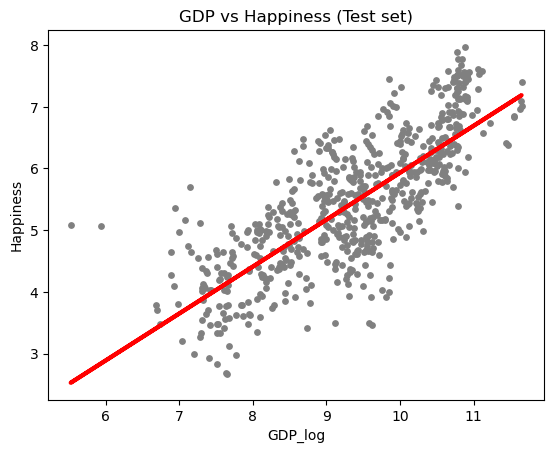

In [96]:
# Create a plot that shows the regression line from the model on the test set.
plot_gdp_test = plt
plot_gdp_test.scatter(X_gdp_test, y_gdp_test, color='gray', s = 15)
plot_gdp_test.plot(X_gdp_test, y_gdp_predicted, color='red', linewidth =3)
plot_gdp_test.title('GDP vs Happiness (Test set)')
plot_gdp_test.xlabel('GDP_log')
plot_gdp_test.ylabel('Happiness')
plot_gdp_test.show()

In [97]:
# Create objects that contain the model summary statistics.
rmse_gdp = mean_squared_error(y_gdp_test, y_gdp_predicted) # This is the mean squared error
r2_gdp = r2_score(y_gdp_test, y_gdp_predicted) # This is the R2 score. 

In [98]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_gdp.coef_)
print('Mean squared error: ', rmse_gdp)
print('R2 score: ', r2_gdp)

Slope: [[0.76109726]]
Mean squared error:  0.4719070262494285
R2 score:  0.5998478263666289


In [99]:
df_gdp['GDP_log'].describe()

count    2106.000000
mean        9.417932
std         1.149928
min         5.527000
25%         8.523750
50%         9.520000
75%        10.407750
max        11.676000
Name: GDP_log, dtype: float64

In [100]:
print('Variance is:', 1.149928 ** 2)

Variance is: 1.3223344051840002


MSE is considered to be good if less than 10% of variance, i.e. 0.13. For GDP vs. Happiness, the MSE of 0.47 is higher than this value. 

**Social Support**

In [103]:
# Create a regression object.
regression_soc = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [104]:
# Fit the regression object onto the training set.
regression_soc.fit(X_soc_train, y_soc_train)

LinearRegression()

In [105]:
# Predict the values of y using X.
y_soc_predicted = regression_soc.predict(X_soc_test)

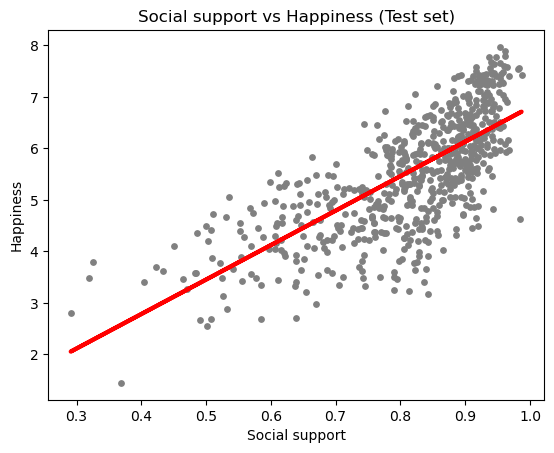

In [106]:
# Create a plot that shows the regression line from the model on the test set.
plot_soc_test = plt
plot_soc_test.scatter(X_soc_test, y_soc_test, color='gray', s = 15)
plot_soc_test.plot(X_soc_test, y_soc_predicted, color='red', linewidth =3)
plot_soc_test.title('Social support vs Happiness (Test set)')
plot_soc_test.xlabel('Social support')
plot_soc_test.ylabel('Happiness')
plot_soc_test.show()

In [107]:
# Create objects that contain the model summary statistics.
rmse_soc = mean_squared_error(y_soc_test, y_soc_predicted) # This is the mean squared error
r2_soc = r2_score(y_soc_test, y_soc_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_soc.coef_)
print('Mean squared error: ', rmse_soc)
print('R2 score: ', r2_soc)

Slope: [[6.6954624]]
Mean squared error:  0.6314279884610443
R2 score:  0.5142766429699974


In [108]:
df_soc['Social_support'].describe()

count    2121.000000
mean        0.807567
std         0.121748
min         0.228000
25%         0.742000
50%         0.832000
75%         0.903000
max         0.987000
Name: Social_support, dtype: float64

In [109]:
print('Variance is:', 0.121748 ** 2)

Variance is: 0.014822575503999999


MSE is considered to be good if less than 10% of variance, i.e. 0.0015. The MSE of 0.63 exceeds this value.

**Life expectancy**

In [112]:
# Create a regression object.
regression_life = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [113]:
# Fit the regression object onto the training set.
regression_life.fit(X_life_train, y_life_train)

LinearRegression()

In [114]:
# Predict the values of y using X.
y_life_predicted = regression_life.predict(X_life_test)

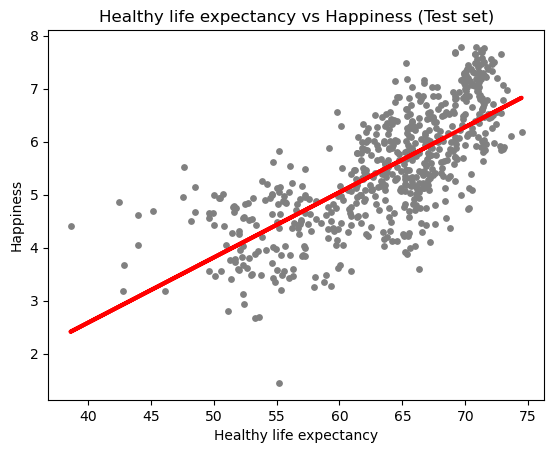

In [115]:
# Create a plot that shows the regression line from the model on the test set.
plot_life_test = plt
plot_life_test.scatter(X_life_test, y_life_test, color='gray', s = 15)
plot_life_test.plot(X_life_test, y_life_predicted, color='red', linewidth =3)
plot_life_test.title('Healthy life expectancy vs Happiness (Test set)')
plot_life_test.xlabel('Healthy life expectancy')
plot_life_test.ylabel('Happiness')
plot_life_test.show()

In [116]:
# Create objects that contain the model summary statistics.
rmse_life = mean_squared_error(y_life_test, y_life_predicted) # This is the mean squared error
r2_life = r2_score(y_life_test, y_life_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_life.coef_)
print('Mean squared error: ', rmse_life)
print('R2 score: ', r2_life)

Slope: [[0.12319836]]
Mean squared error:  0.5832447585285626
R2 score:  0.52908424094161


In [117]:
df_life['Life_expectancy'].describe()

count    2073.000000
mean       63.595328
std         6.643333
min        17.360000
25%        59.400000
50%        65.220000
75%        68.750000
max        74.600000
Name: Life_expectancy, dtype: float64

In [118]:
print('Variance is:', 6.643333 ** 2)

Variance is: 44.133873348889004


MSE is considered to be good if less than 10% of variance, i.e. 4.4. The MSE of 0.58 is lower than this value.

### 4. Reflections on the analysis

None of the median square root errors (MSE), nor the R²-values indicate a strong, simple relationship between happiness and the independent variables (democracy, GDP, social support, life expectancy and inflation). This supports our first hypothesis that happiness is influenced by many factors.
However, it was surprising to see that the models performance as expressed by the median square root error was not as expected. Based on previous analysis we already know there is no correlation between inflation and happiness. However, the value of the calculated MSE could be considered “good” since it is less than 10% of variance. However, R²=0.08 shows us that the model can only accurately predict 8% of the variance in Inflation vs. Happiness, showing that the model is clearly not a good predictor. 


The model seems to predict Live Expectancy vs Happiness best (MSE = 0.58 and R²=0.53). None of the other independent variables have a “good” MSE, while their R²-values are between 0.6 (GDP) and 0.39 (Democracy).


Overall, this supports the hypothesis that Inflation vs Happiness would be hardest to predict using linear regression. However, since almost all variables performed poorly in the model it is not a clear a confirmation of the hypothesis as expected. 